<a href="https://colab.research.google.com/github/MGSev/Workbook-DLMAIIAC-Casual-Inference/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a Casual Graph



In [1]:
from google.colab import files
uploaded = files.upload()

Saving Diet.csv to Diet.csv


In [2]:
import pandas as pd

# Load the dataframe.
df = pd.read_csv('Diet.csv')

# Print some info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Diet          5 non-null      int64
 1   Exercise      5 non-null      int64
 2   Weight_loss   5 non-null      int64
 3   Age           5 non-null      int64
 4   Stress        5 non-null      int64
dtypes: int64(5)
memory usage: 332.0 bytes


Task 6
We would analyze how Diet can influence Exercise and weight loss.
Let us consider the following DAG, Direct Acyclic Graph, which represents the data-generating pro-cess.
Exercise = Treatment
Weight Loss = Outcome
Diet = Confounder


In [3]:
#define a casual grapfh
!pip install dowhy
import dowhy
from dowhy import CausalModel

causal_graph = """
digraph { Diet -> Exercise;
  Diet -> Weight_loss;
  Exercise -> Weight_loss;
 }
"""

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.6/192.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
/usr/local/lib/python3.11/dist-packages/dowhy/causal_model.py:583: UserWarning: 3 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


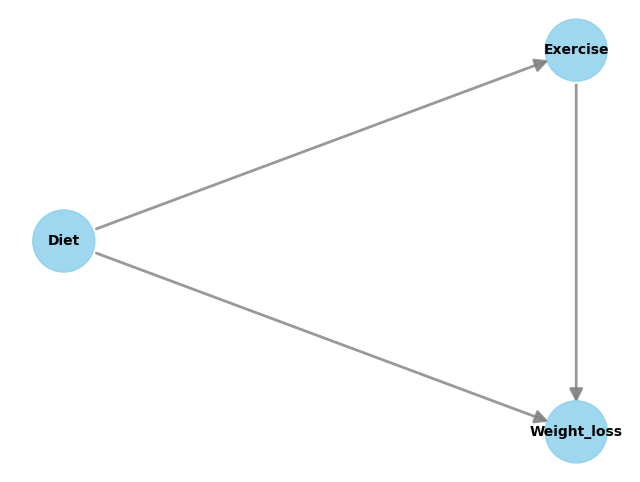

In [4]:
#Create a causal model from the data and given graph.
model = CausalModel(
    data=df,
    graph=causal_graph.replace("\n", " "),
    treatment='Exercise',
    outcome='Weight_loss',
    common_causes=['Diet']
)
#visualize the graph
model.view_model()

In [5]:
causal_graph = """
digraph {

  Age -> Diet;
  Age -> Exercise;
  Age-> Weight_loss;
  Exercise -> Diet;
  Diet -> Weight_loss;
   }
"""

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


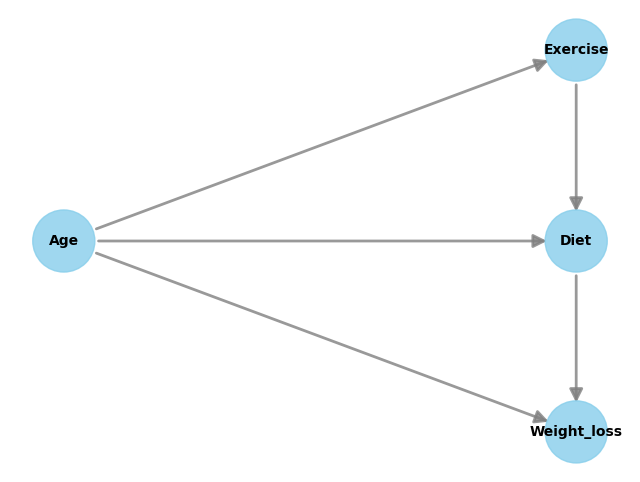

In [6]:
#Create a causal model from the data and given graph.
model = CausalModel(
    data=df,
    graph=causal_graph.replace("\n", " "),
    treatment='Exercise',
    outcome='Weight_loss',
    common_causes=['Age']
)
#visualize the graph
model.view_model()

In [7]:
causal_graph = """
digraph {
Stress->Exercise;
Stress->Weight_loss;
 Exercise->Diet;
  Diet -> Weight_loss;
   }
"""

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


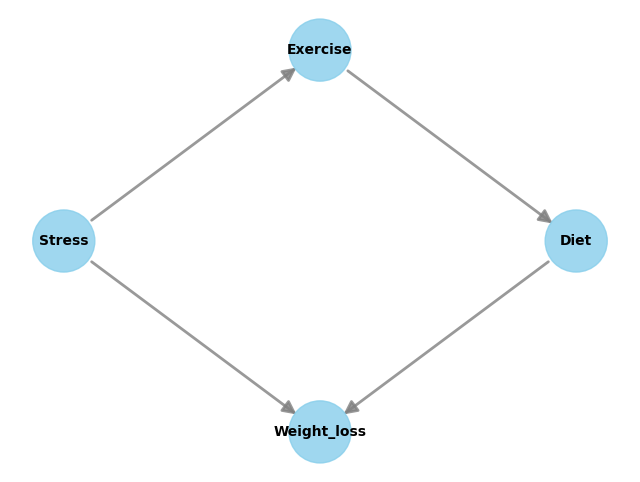

In [8]:
#Create a causal model from the data and given graph.
model = CausalModel(
    data=df,
    graph=causal_graph.replace("\n", " "),
    treatment='Exercise',
    outcome='Weight_loss',
    common_causes=['Stress']
)
#visualize the graph
model.view_model()